# 1. Load dataset

#### In this notebook, we will use a turbo.az dataset which is a collection of cars (Mercedes C-class). It contains information about 1328 cars with features of (Sheher, Marka, Model, Buraxilish ili, Ban novu, Reng, Muherrikin hecmi, Muherrikin gucu, Yanacaq novu, Yurush, Suretler qutusu, Oturucu, Yeni, Qiymet, Extra Information, Seller’s comment). We will need to read the data from data file (turboaz.csv) and extract only 3 columns for your model:
X1 - Yurush (mileage)<br>
X2 - Buraxilish ili (model year)<br>
Y - Qiymet (price)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('turboaz.xls', usecols=['Yurush', 'Buraxilish ili', 'Qiymet'])

In [3]:
df['Yurush'] = df['Yurush'].apply(lambda x: float(''.join(x.split()[:-1])))

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328 entries, 0 to 1327
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Buraxilish ili  1328 non-null   int64  
 1   Yurush          1328 non-null   float64
 2   Qiymet          1328 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 31.2+ KB


In [5]:
df.head()

,Buraxilish ili,Yurush,Qiymet
0,1999,366000.0,12500 AZN
1,2014,102000.0,31500 $
2,2002,469700.0,11700 AZN
3,1998,556680.0,9700 AZN
4,2000,300000.0,12700 AZN


In [6]:
# Converting AZ column names to English ones for better understanding and processing price field
df = df.rename(columns={"Buraxilish ili": "production_year", "Yurush": "total_distance", "Qiymet": "price"})

In [7]:
df['price'].apply(lambda x: x.split()[-1]).unique()

array(['AZN', '$'], dtype=object)

In [8]:
df['price'] = df['price'].apply(
    lambda x: float(''.join(x.split()[:-1])) if x.split()[-1] == 'AZN' else float(''.join(x.split()[:-1]))*1.7
)

In [9]:
df.head()

,production_year,total_distance,price
0,1999,366000.0,12500.0
1,2014,102000.0,53550.0
2,2002,469700.0,11700.0
3,1998,556680.0,9700.0
4,2000,300000.0,12700.0


# 2. Visualize

#### Using matplotlib library (scatter, Axes3D), we will provide 3 visualizations of data:
a) price (Y) vs total_distance (X1)<br>
b) price (Y) vs production_year (X2)<br>
c) 3D plot of all three values (Y, X1, X2)<br>

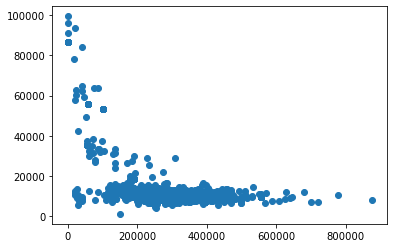

In [10]:
# plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(x='total_distance', y='price', data=df)

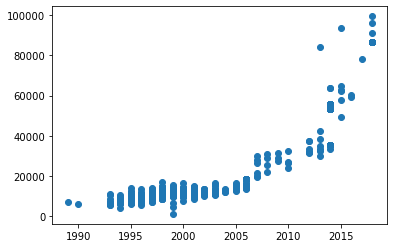

In [11]:
# plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(x='production_year', y='price', data=df)

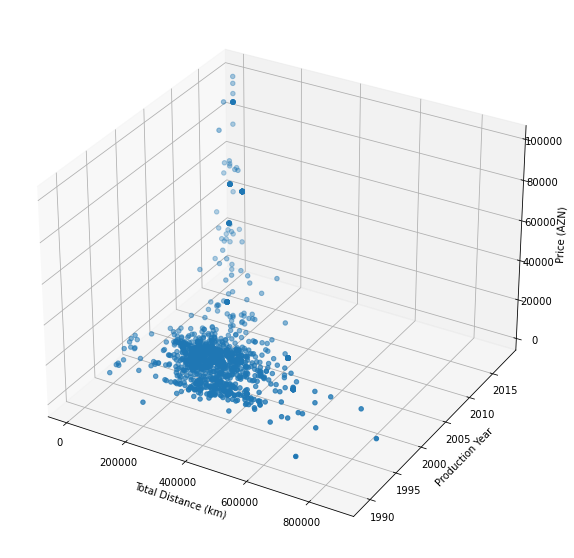

In [12]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(df['total_distance'], df['production_year'], df['price'])
ax.set_xlabel('Total Distance (km)')
ax.set_ylabel('Production Year')
ax.set_zlabel('Price (AZN)')

plt.show()

# 3. Linear Regresa a mi

#### Implementing Linear Regression from scratch (using numpy)
a) Calculate cost function. Implement a function which returns cost given true y values, x values and parameters (w).<br>
<div>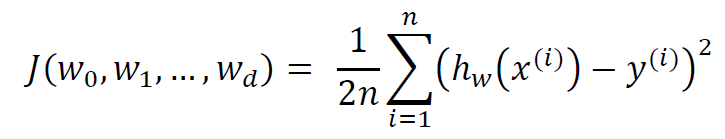</div>

In [13]:
w0, w1, w2 = 3.103902677050526e-14, 0.85863195, 1.99243368

def h_w(x0, x1):
    return w0 + x0*w1 + x1*w2

b) Normalize data using Z score normalization (Recommended).<br>

In [15]:
from scipy.stats import zscore

norm_df = df.apply(zscore)

In [16]:
norm_df.head()

,production_year,total_distance,price
0,-0.162545,0.716157,-0.191748
1,2.653016,-1.473366,2.816619
2,0.400567,1.576209,-0.250376
3,-0.350249,2.297590,-0.396947
4,0.025159,0.168776,-0.177091


In [17]:
initial_cost = 1/(2*df.shape[0])*np.sum(
    np.power(h_w(norm_df['total_distance'], norm_df['production_year']) - norm_df['price'], 2)
)

initial_cost

0.6030584320123504

c) Implement gradient descent algorithm to minimize the cost function.
- Assign initial values of W=(w0, w1, w2) to zero or choose randomly
- Learning rate: alpha=0.001, you can change it in different experiments
- Number of iterations: 10000 or you can stop it when two sequential values are too close.
- Calculate values of parameters using gradient descent formula.
<div>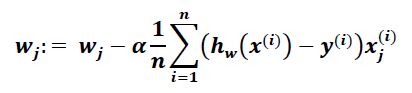</div>

In [18]:
def linear_regression(inputs, targets, iterations, learning_rate):
    costs = []
    values_count = inputs.shape[1]
    size = inputs.shape[0]
    weights = [0, 0]
    bias = 0

    for _ in range(iterations):
        loss = bias + np.dot(inputs, weights) - targets
        
        # Calculating the gradient descent       
        d_weights = np.dot(inputs.T, loss) / size
        
        d_bias = np.sum(loss) / size
        
        # Updating weigths and bias       
        weights = weights - (learning_rate * d_weights)
        bias = bias - (learning_rate * d_bias)
        
        # Keep track of cost function values for each iteration
        cost = np.sqrt(np.sum(loss ** 2) / (2 * size)) 
        costs.append(cost)

    return weights, bias, costs

In [32]:
iterations = 80
learning_rate = 0.1

weigths, bias, costs = linear_regression(norm_df[['production_year', 'total_distance']], norm_df['price'], iterations, learning_rate)

In [27]:
weigths

array([ 0.83086151, -0.0933497 ])

In [28]:
bias

1.6963940292652e-14

In [29]:
# Final cost
costs[-1]

0.32591850961837265

## Viualization of results

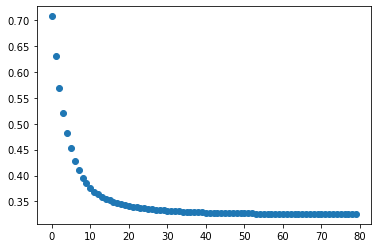

In [33]:
# Visualize cost function
plt.plot(range(iterations), costs, 'o')

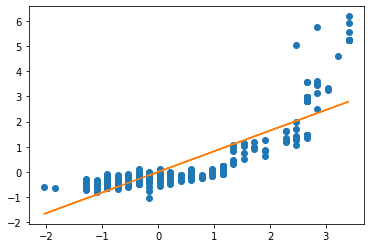

In [38]:
# plot the linear regression line for production year and price
plt.plot(norm_df['production_year'], norm_df['price'], 'o')
plt.plot(norm_df['production_year'], weigths[0]*norm_df['production_year'] + bias)

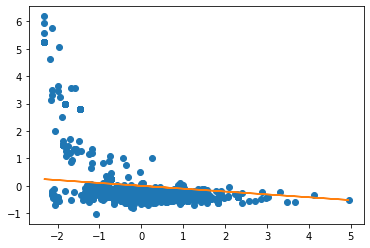

In [39]:
# plot the linear regression line for total distance and price
plt.plot(norm_df['total_distance'], norm_df['price'], 'o')
plt.plot(norm_df['total_distance'], weigths[1]*norm_df['total_distance'] + bias)